**To change Dockerfile name and can build image from it:**  

`docker build -f Dockerfile.dev .`

**Every change in the code requires rebuilding the image then recreate the container so we use Docker Volumes**

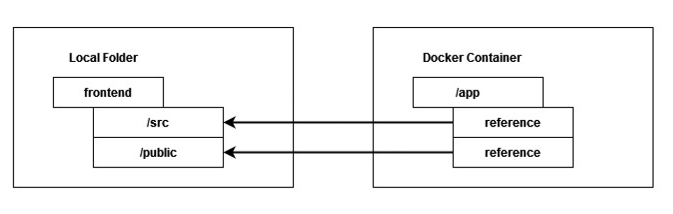